In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("bodyPerformance.csv")
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

In [4]:
df.describe()

age     height_cm     weight_kg    body fat_%     diastolic  \
count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
mean      36.775106    168.559807     67.447316     23.240165     78.796842   
std       13.625639      8.426583     11.949666      7.256844     10.742033   
min       21.000000    125.000000     26.300000      3.000000      0.000000   
25%       25.000000    162.400000     58.200000     18.000000     71.000000   
50%       32.000000    169.200000     67.400000     22.800000     79.000000   
75%       48.000000    174.800000     75.300000     28.000000     86.000000   
max       64.000000    193.800000    138.100000     78.400000    156.200000   

           systolic     gripForce  sit and bend forward_cm  sit-ups counts  \
count  13393.000000  13393.000000             13393.000000    13393.000000   
mean     130.234817     36.963877                15.209268       39.771224   
std       14.713954     10.624864                 8.456677       14.276698   
min        0.000000      0.000000               -25.000000        0.000000   
25%      120.000000     27.500000                10.900000       30.000000   
50%      130.000000     37.900000                16.200000       41.000000   
75%      141.000000     45.200000                20.700000       50.000000   
max      201.000000     70.500000               213.000000       80.000000   

       broad jump_cm  
count   13393.000000  
mean      190.129627  
std        39.868000  
min         0.000000  
25%       162.000000  
50%       193.000000  
75%       221.000000  
max       303.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

#### **Label Encoder**

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])

In [10]:
df.head()

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0       1      172.3      75.24        21.3       80.0     130.0   
1  25.0       1      165.0      55.80        15.7       77.0     126.0   
2  31.0       1      179.6      78.00        20.1       92.0     152.0   
3  32.0       1      174.5      71.10        18.4       76.0     147.0   
4  28.0       1      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0       54.9                     18.4            60.0          217.0      2  
1       36.4                     16.3            53.0          229.0      0  
2       44.8                     12.0            49.0          181.0      2  
3       41.4                     15.2            53.0          219.0      1  
4       43.5                     27.1            45.0          217.0      1

<Axes: >

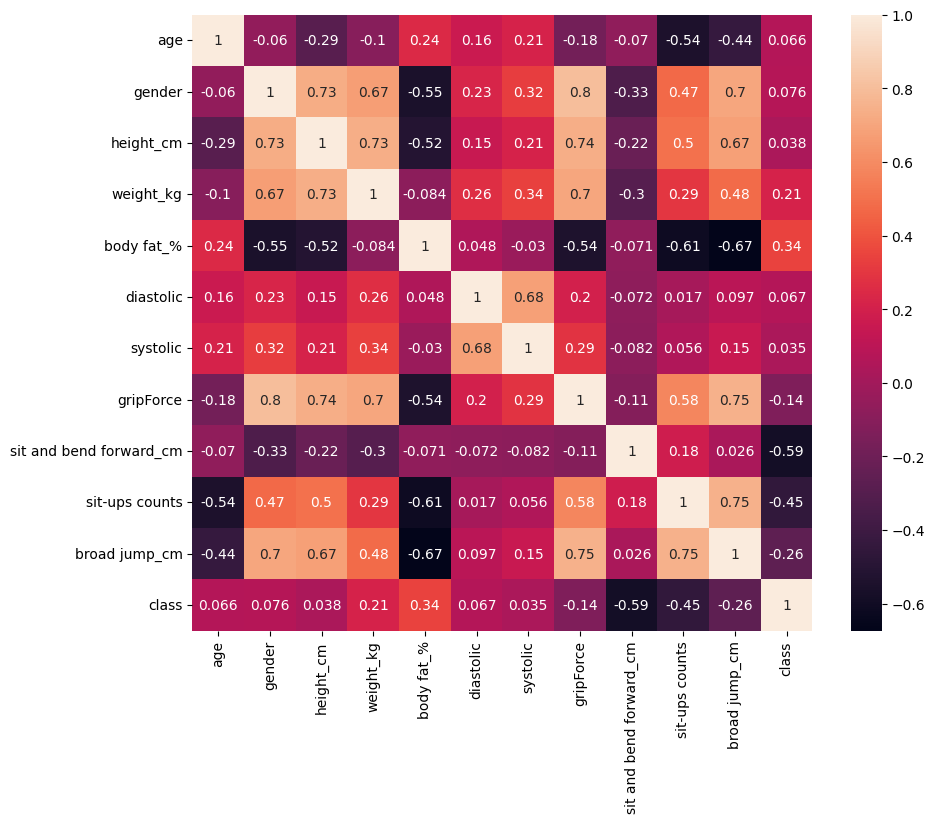

In [11]:
plt.figure(figsize=(10, 8), dpi= 100)
sns.heatmap(df.corr(), annot= True)

<Axes: xlabel='weight_kg', ylabel='body fat_%'>

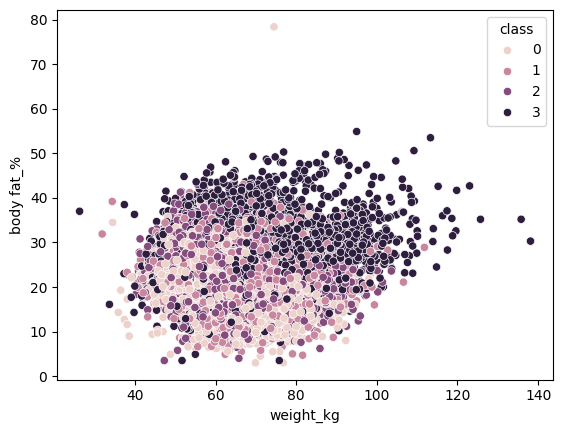

In [12]:
sns.scatterplot(x= "weight_kg", y= "body fat_%", hue= "class", data=df)

<Axes: xlabel='height_cm', ylabel='weight_kg'>

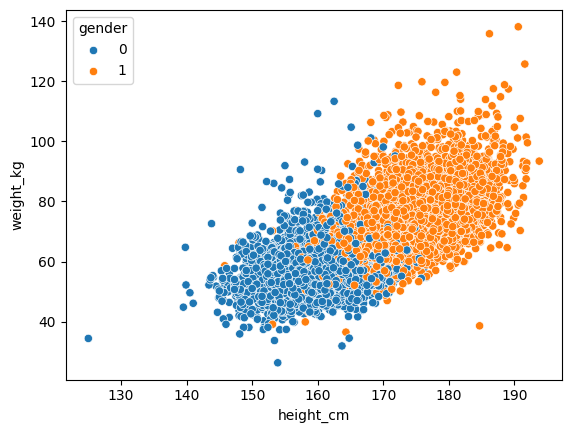

In [14]:
sns.scatterplot(x= "height_cm", y= "weight_kg", hue= "gender", data=df)

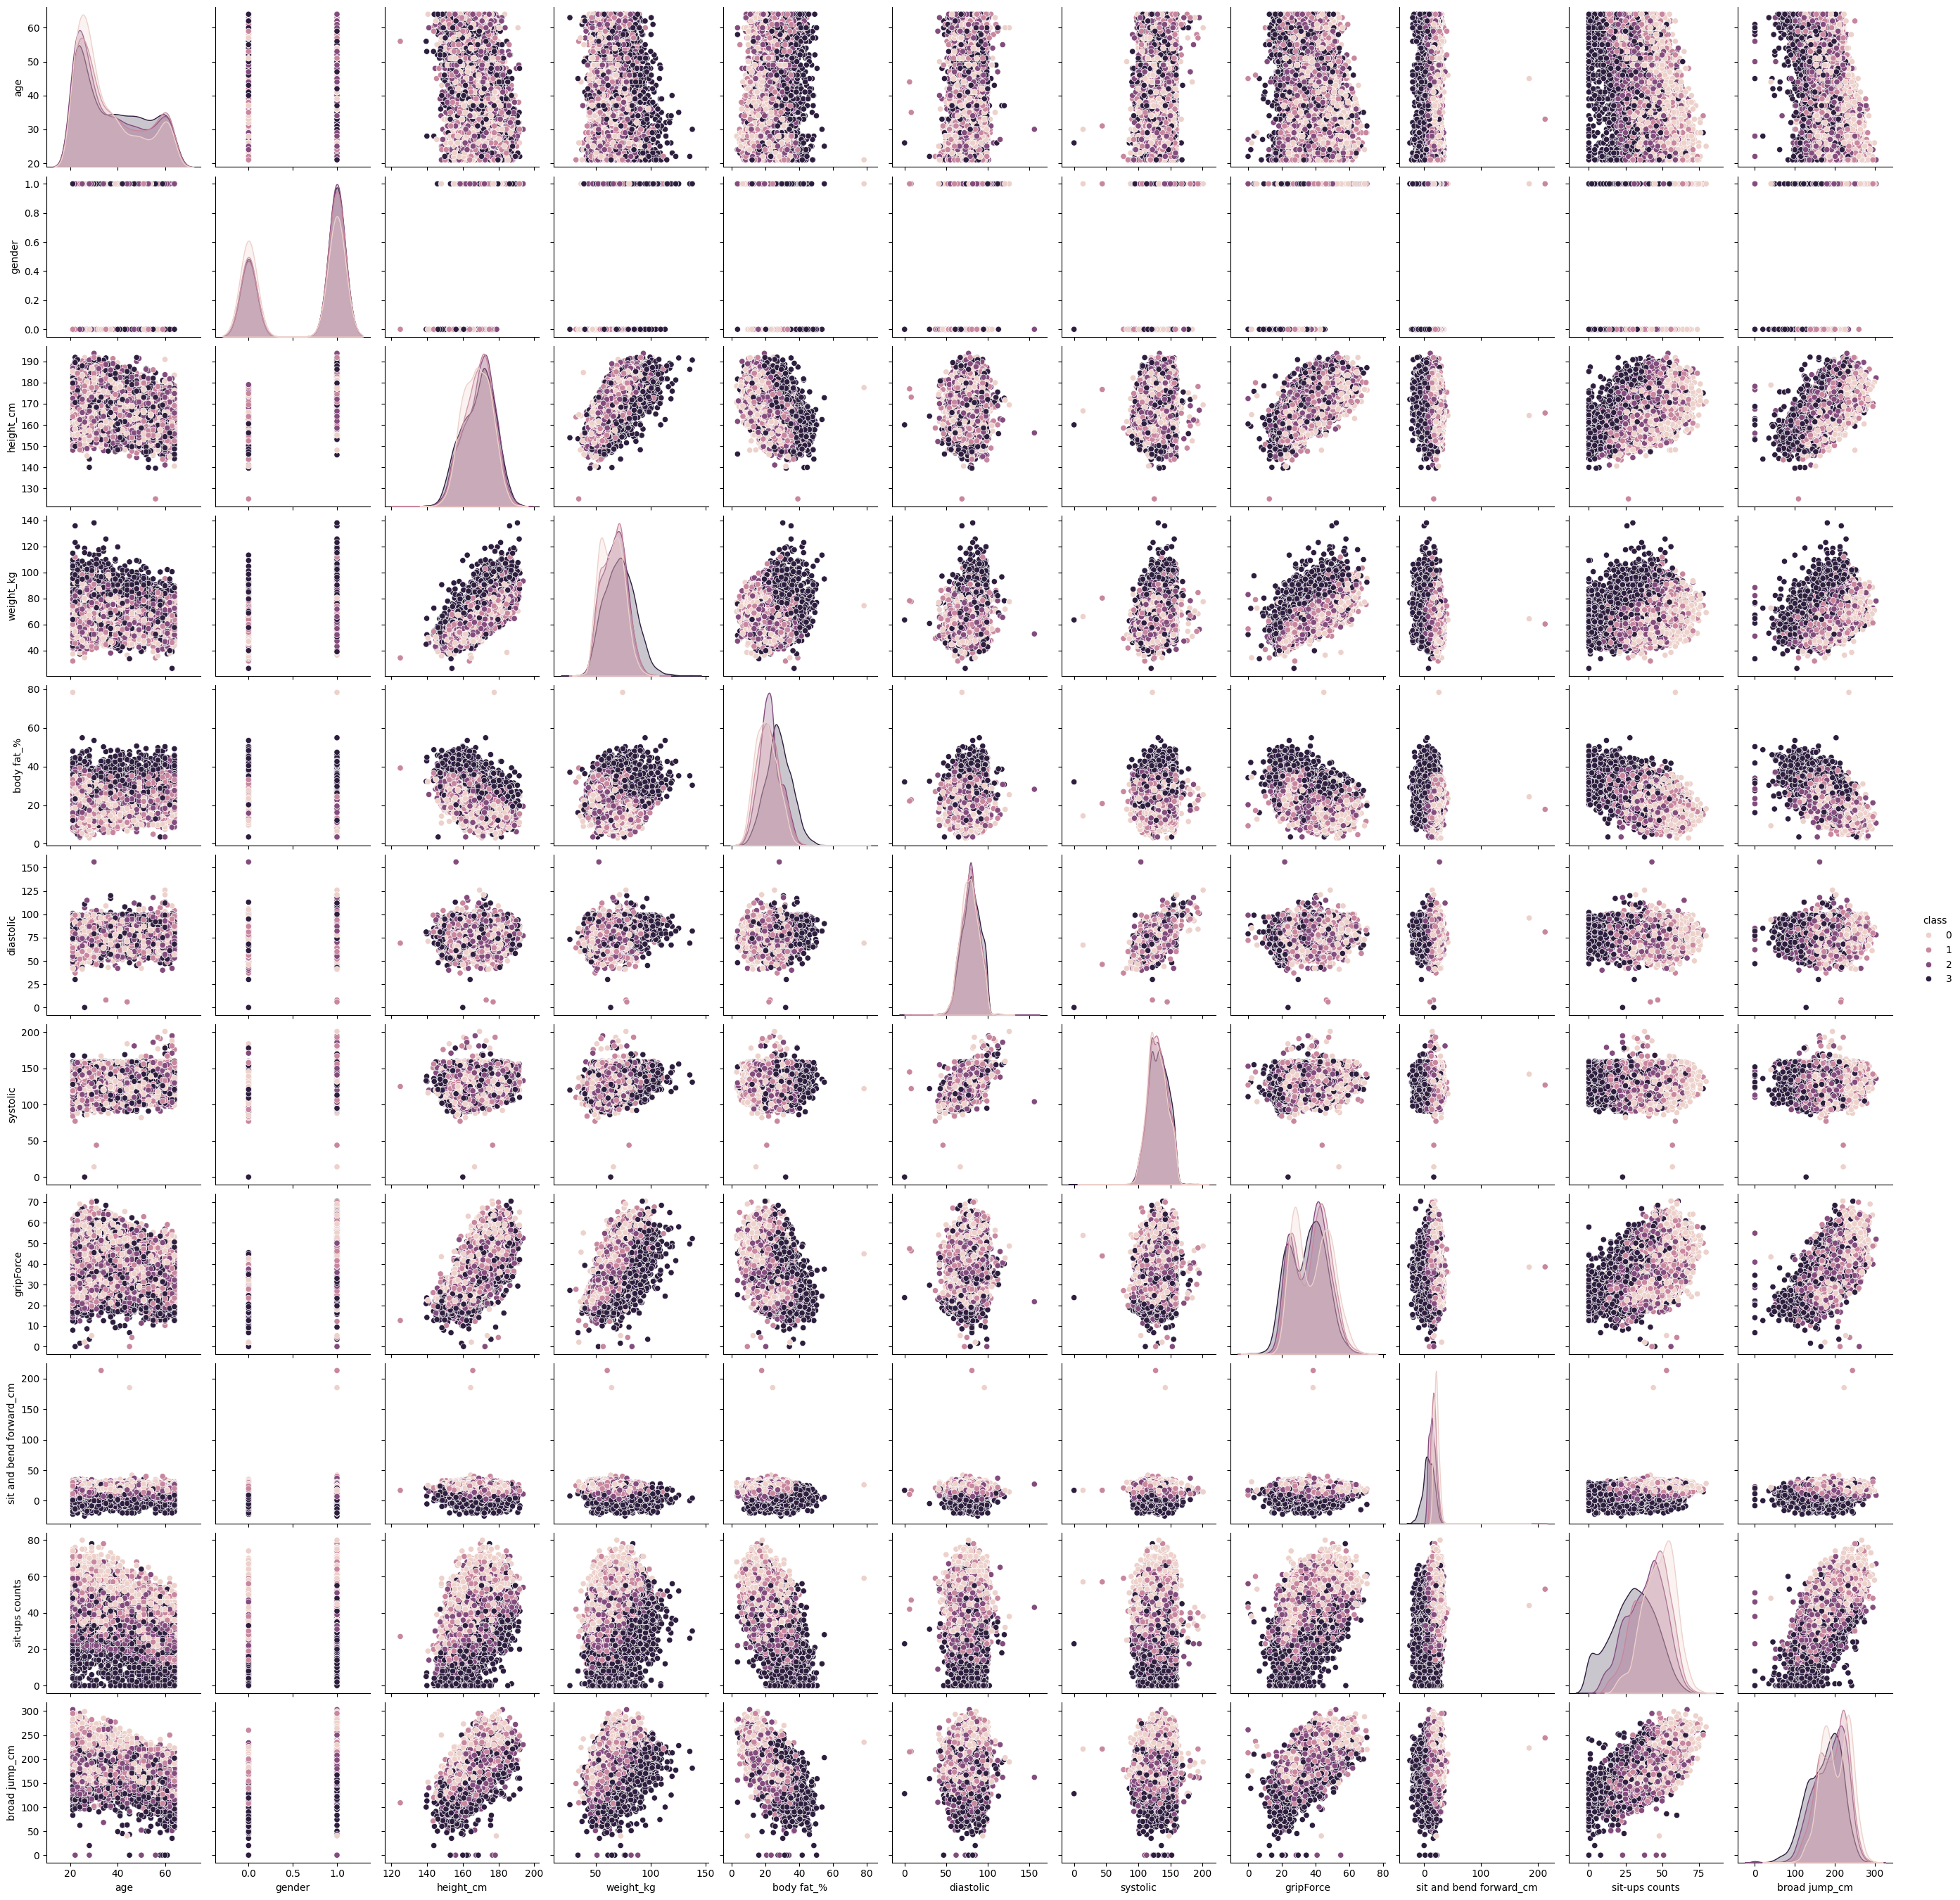

In [16]:
sns.pairplot(data=df, hue= "class")

##### **X and y**

In [17]:
X = df.drop("class", axis=1)
y = df["class"]

### **Train Test Split**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)

#### **Standart Scaler**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### **Metrics**

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

### **KNN Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
num_neighbours = np.arange(1, 15, 2)

for n in num_neighbours:
    n_knn = KNeighborsClassifier(n_neighbors= n)
    n_knn.fit(scaled_X_train, y_train)

    n_knn_pred = n_knn.predict(scaled_X_test)
    acc = accuracy_score(y_test, n_knn_pred)
    print(f"Number of Neighbours : {n}, Accuracy Score : {acc}")

Number of Neighbours : 1, Accuracy Score : 0.5649253731343283
Number of Neighbours : 3, Accuracy Score : 0.582089552238806
Number of Neighbours : 5, Accuracy Score : 0.6126865671641791
Number of Neighbours : 7, Accuracy Score : 0.6261194029850746
Number of Neighbours : 9, Accuracy Score : 0.6305970149253731
Number of Neighbours : 11, Accuracy Score : 0.6365671641791045
Number of Neighbours : 13, Accuracy Score : 0.6358208955223881


In [35]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [36]:
knn_pred = knn.predict(scaled_X_test)

In [37]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       367
           1       0.41      0.50      0.45       302
           2       0.59      0.52      0.55       336
           3       0.94      0.66      0.77       335

    accuracy                           0.64      1340
   macro avg       0.66      0.63      0.63      1340
weighted avg       0.66      0.64      0.64      1340



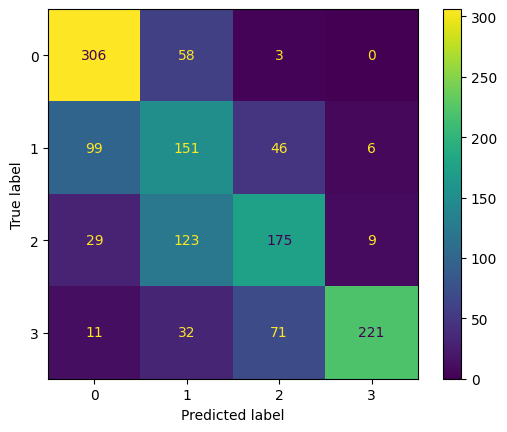

In [38]:
ConfusionMatrixDisplay.from_estimator(knn, scaled_X_test, y_test)

### **Random Forest Regression**

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rand_frst = RandomForestClassifier()
rand_frst.fit(X_train, y_train)

RandomForestClassifier()

In [41]:
rand_pred = rand_frst.predict(X_test)

In [42]:
print(classification_report(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       367
           1       0.55      0.61      0.58       302
           2       0.70      0.65      0.67       336
           3       0.90      0.79      0.84       335

    accuracy                           0.73      1340
   macro avg       0.73      0.72      0.72      1340
weighted avg       0.74      0.73      0.73      1340



### **Gradinet Boost**

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gr_boost = GradientBoostingClassifier()
gr_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [46]:
gr_pred = gr_boost.predict(X_test)

In [47]:
print(classification_report(y_test, gr_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       367
           1       0.54      0.59      0.56       302
           2       0.71      0.63      0.66       336
           3       0.89      0.78      0.83       335

    accuracy                           0.72      1340
   macro avg       0.72      0.72      0.72      1340
weighted avg       0.73      0.72      0.72      1340



### **AdaBoost**

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
rand_frst_two = RandomForestClassifier()

In [53]:
ada_boost = AdaBoostClassifier(rand_frst_two, n_estimators= 50)
ada_boost.fit(X_train, y_train)

C:\Users\himme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

In [54]:
ada_pred = ada_boost.predict(X_test)

In [55]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       367
           1       0.56      0.61      0.58       302
           2       0.71      0.67      0.69       336
           3       0.90      0.79      0.84       335

    accuracy                           0.74      1340
   macro avg       0.74      0.73      0.73      1340
weighted avg       0.74      0.74      0.74      1340



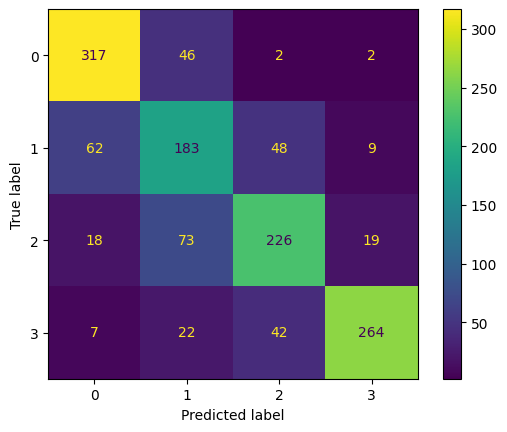

In [57]:
ConfusionMatrixDisplay.from_estimator(ada_boost, X_test, y_test)

### **Xgboost**

In [58]:
import xgboost as xgb

In [59]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss')

In [60]:
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [61]:
xgb_pred = xgb_model.predict(X_test)

In [63]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       367
           1       0.56      0.59      0.57       302
           2       0.71      0.68      0.69       336
           3       0.91      0.82      0.86       335

    accuracy                           0.74      1340
   macro avg       0.74      0.73      0.74      1340
weighted avg       0.75      0.74      0.74      1340



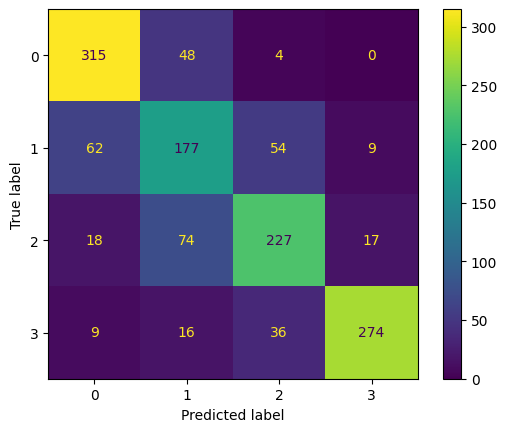

In [64]:
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test)

* The models gave similar results